In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('/Users/juhimishra/Downloads/DSData-master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data.shape

(158, 12)

In [6]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [26]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


In [27]:
lab_enc = LabelEncoder()
ohe = OneHotEncoder()

In [28]:
df2 = lab_enc.fit_transform(data['Country'])
pd.Series(df2)

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Length: 158, dtype: int64

In [29]:
data['Country'] = df2

In [30]:
df3 = lab_enc.fit_transform(data['Region'])
pd.Series(df3)

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Length: 158, dtype: int64

In [31]:
data['Region']=df3

In [32]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,-0.972226,1.39651,1.669206,1.491765,1.756335,1.773991,0.622391,2.51738
1,58,9,2,7.561,0.309350,1.30232,2.012132,1.532348,1.439946,0.315993,1.480995,2.70201
2,37,9,3,7.527,-1.062017,1.32548,1.739586,1.085223,1.615733,1.906792,0.927973,2.49204
3,105,9,4,7.522,-0.503610,1.45900,1.553118,1.147600,1.792821,1.624007,0.964080,2.46531
4,24,5,5,7.427,-0.823548,1.32629,1.501726,1.270179,1.475479,1.503484,1.592224,2.45176


In [33]:
y = data['Dystopia Residual']
x = data.drop(columns =['Dystopia Residual'])

In [48]:
x.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,135,9,1,7.587,-0.972226,1.39651,1.669206,1.491765,1.756335,1.773991,0.622391
1,58,9,2,7.561,0.309350,1.30232,2.012132,1.532348,1.439946,0.315993,1.480995
2,37,9,3,7.527,-1.062017,1.32548,1.739586,1.085223,1.615733,1.906792,0.927973
3,105,9,4,7.522,-0.503610,1.45900,1.553118,1.147600,1.792821,1.624007,0.964080
4,24,5,5,7.427,-0.823548,1.32629,1.501726,1.270179,1.475479,1.503484,1.592224


In [49]:
y.head()

0    2.51738
1    2.70201
2    2.49204
3    2.46531
4    2.45176
Name: Dystopia Residual, dtype: float64

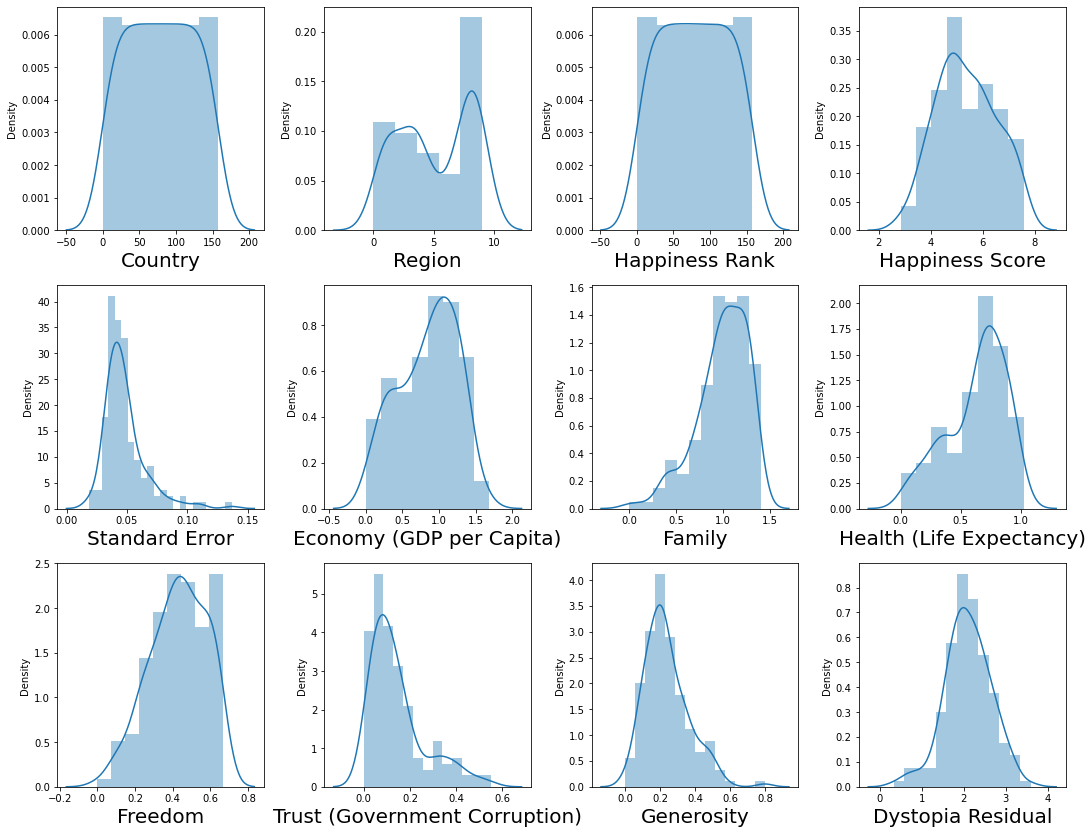

In [17]:
plt.figure(figsize = (15,15), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [15]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

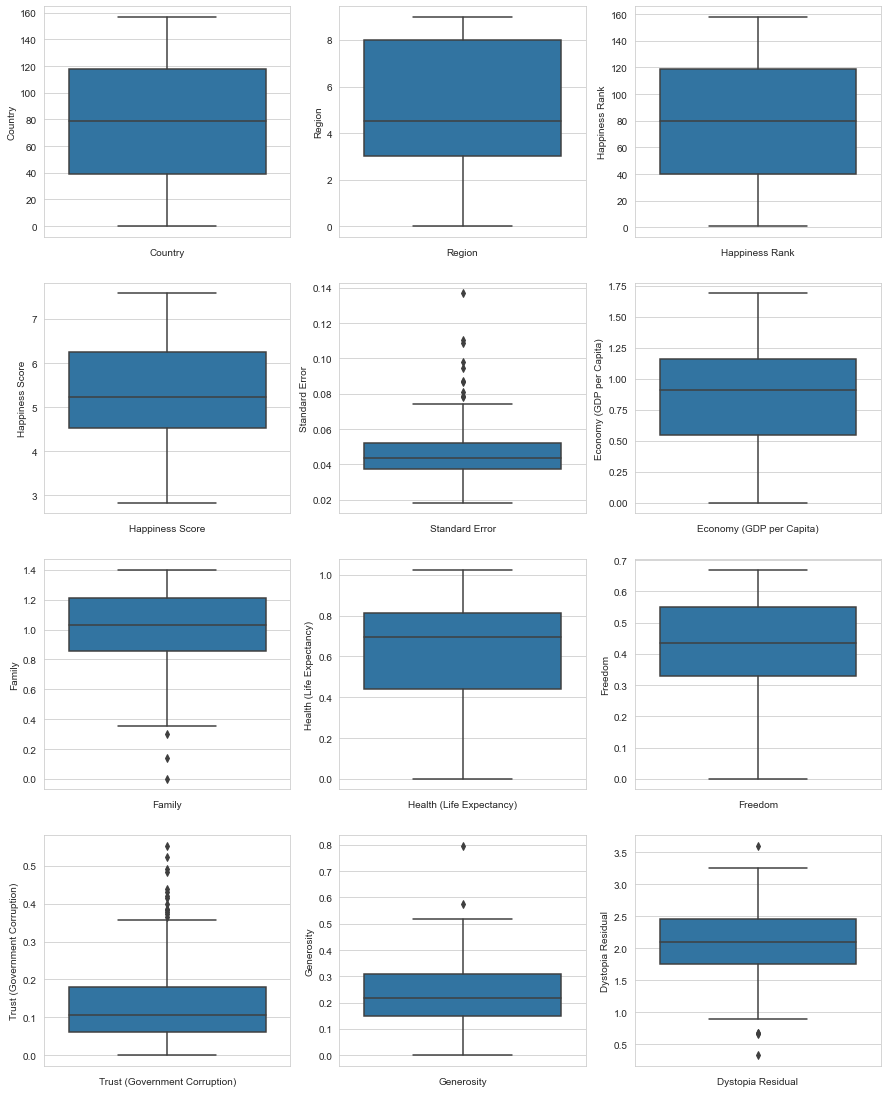

In [16]:
plt.figure(figsize=(15,50))

graph=1

for column in data.columns:
    if graph<=30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(y=data[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [16]:
features = ['Standard Error','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']


In [17]:
from sklearn.preprocessing import PowerTransformer

In [18]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [19]:
data[features] = scaler.fit_transform(data[features].values)

In [20]:
data[features].head()

,Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-0.972226,1.669206,1.491765,1.756335,1.773991,0.622391
1,0.309350,2.012132,1.532348,1.439946,0.315993,1.480995
2,-1.062017,1.739586,1.085223,1.615733,1.906792,0.927973
3,-0.503610,1.553118,1.147600,1.792821,1.624007,0.964080
4,-0.823548,1.501726,1.270179,1.475479,1.503484,1.592224


In [21]:
data[features].skew()

Standard Error                  -0.020092
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
dtype: float64

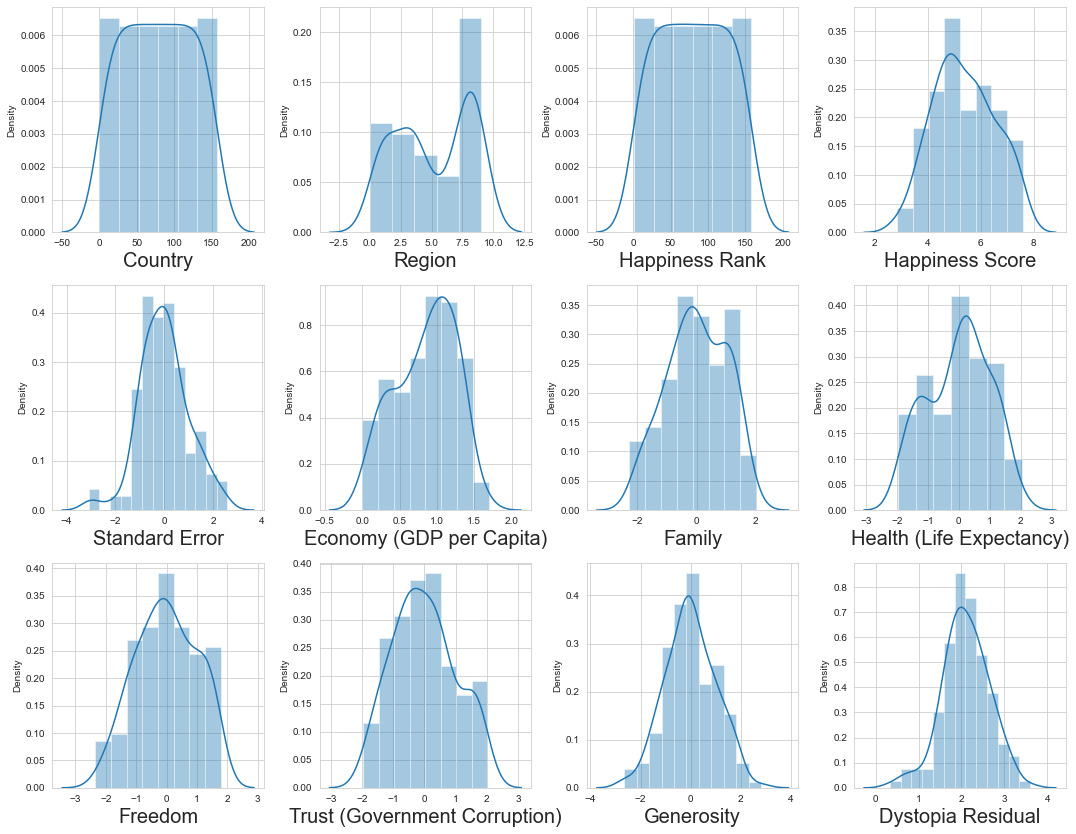

In [22]:
plt.figure(figsize = (15,15), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

From above graph we can see that skewness have been removed

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(x)
X_scaler

array([[ 1.23877001,  1.30025593, -1.72099989, ...,  1.75633466,
         1.7739906 ,  0.62239052],
       [-0.44946522,  1.30025593, -1.69907456, ...,  1.43994643,
         0.31599326,  1.48099497],
       [-0.90989302,  1.30025593, -1.67714922, ...,  1.6157332 ,
         1.90679206,  0.92797277],
       ...,
       [ 1.26069514, -0.37544095,  1.67742676, ..., -1.66865772,
         0.73891461,  1.65933594],
       [-1.26069514,  0.96511655,  1.69935209, ..., -1.84990313,
        -0.15194623, -0.19482942],
       [ 1.37032081,  0.96511655,  1.72127743, ..., -0.50836227,
        -0.06732622, -0.49041465]])

In [37]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.30,random_state=34)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors


In [62]:
# Instantiating algorithms
lr = LinearRegression()
rf = RandomForestRegressor()
dtr = DecisionTreeRegressor()

In [52]:
# Training LinearRegression Model
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(x_test)

In [57]:
lr.predict(x_test)

array([1.93288755, 2.67384597, 2.46939168, 3.00509511, 1.84969269,
       2.54886835, 2.883299  , 1.69548668, 1.55147404, 2.14124599,
       2.34099976, 2.14876651, 2.52375614, 2.47511424, 1.90399022,
       1.52006257, 0.62225306, 2.59560892, 2.07800923, 2.12751042,
       2.38255259, 2.68024468, 2.49156218, 2.27751382, 3.01945437,
       2.8610259 , 2.02002214, 1.93716476, 2.41175964, 2.02523115,
       1.79634171, 1.73574785, 2.4304826 , 2.47967974, 2.82587766,
       3.20581825, 3.16211954, 1.48275528, 2.04555546, 1.90129617,
       1.87840107, 1.57440189, 2.39435918, 2.79179463, 2.1506348 ,
       1.84905806, 2.32244067, 2.47151047])